<h1> Southern Water Corp Python Case Study!</h1>

<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

# Part I: <span style="color:green">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

To begin the analysis, it's important to set up the environment by importing the necessary libraries. Each library serves a specific purpose in this case study:

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

In [114]:
!pip install --user --upgrade matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------

### Step 2: <span style="color:green">Descriptive Statistics</span> 

The data provided by Southern Water Corp is divided into two key datasets:

1. DF_Raw_Data: This dataset contains all the raw pump data, providing a comprehensive view of the pump's operational status over time.

2. DF_Rolling_Stdev: This dataset captures the rolling standard deviation of the pump data, offering insights into the variability of the measurements.

To begin the analysis, I imported each dataset into its respective dataframe. This separation ensures that we can analyze the raw data and its variability independently, which is crucial for identifying patterns and anomalies.

Once the data was loaded, I generated descriptive statistics using the .describe() and .info() functions. These commands provided a summary of key metrics, such as mean, standard deviation, and quartiles, as well as an overview of the dataset's structure, including data types and non-null counts. This step was critical in understanding the distribution and completeness of the data before diving into more complex analyses.

In [117]:
df_raw = pd.read_csv('DF_Raw_Data.csv')
df_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [118]:
df_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [119]:
df_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


<b> Observations on Standard Deviation and Mean Comparisons

Standard Deviation: The dataframe_raw consistently exhibited larger standard deviation values compared to dataframe_stdev. This suggests greater variability in the raw data, which could be indicative of more fluctuations in the pump's operational metrics before the rolling standard deviation was calculated.

Mean Values: Similarly, the dataframe_raw displayed higher mean values across most variables, except for Pump Failure. This pattern suggests that the raw data generally contains larger measurements, which may be smoothed out in the dataframe_stdev due to the rolling standard deviation calculation. </b>

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Boxplots</span> 

With the descriptive statistics in hand, the next step was to visualize the distribution of the data using boxplots. Boxplots are particularly useful in this context because they clearly display the central tendency, dispersion, and potential outliers in the dataset.

The descriptive statistics generated earlier, especially the quartiles, guided the creation of these boxplots. Each boxplot provided a visual summary of the data, making it easier to compare different aspects of the pump's performance.

Given the structure of the data, I repeated this process for both the dataframe_raw and dataframe_stdev datasets. This dual approach allowed for a direct comparison between the raw measurements and their variability over time.

In addition to boxplots, I also created line plots to further explore trends and patterns within the data. The combination of these visualizations provided a more comprehensive understanding of the pump's behavior, both in normal and failure conditions.

<Axes: >

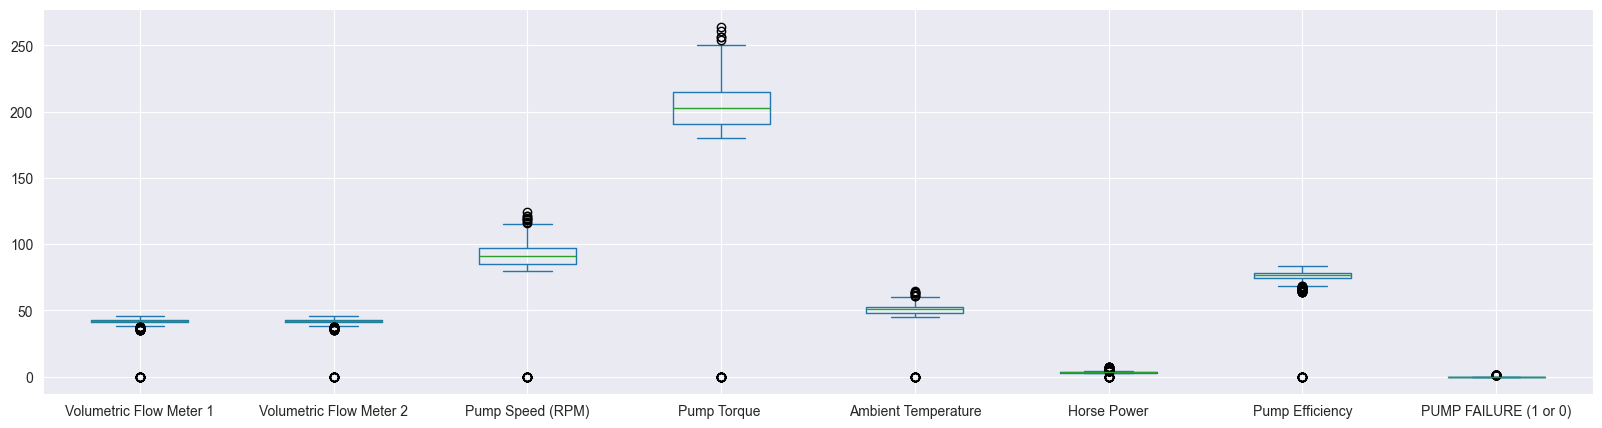

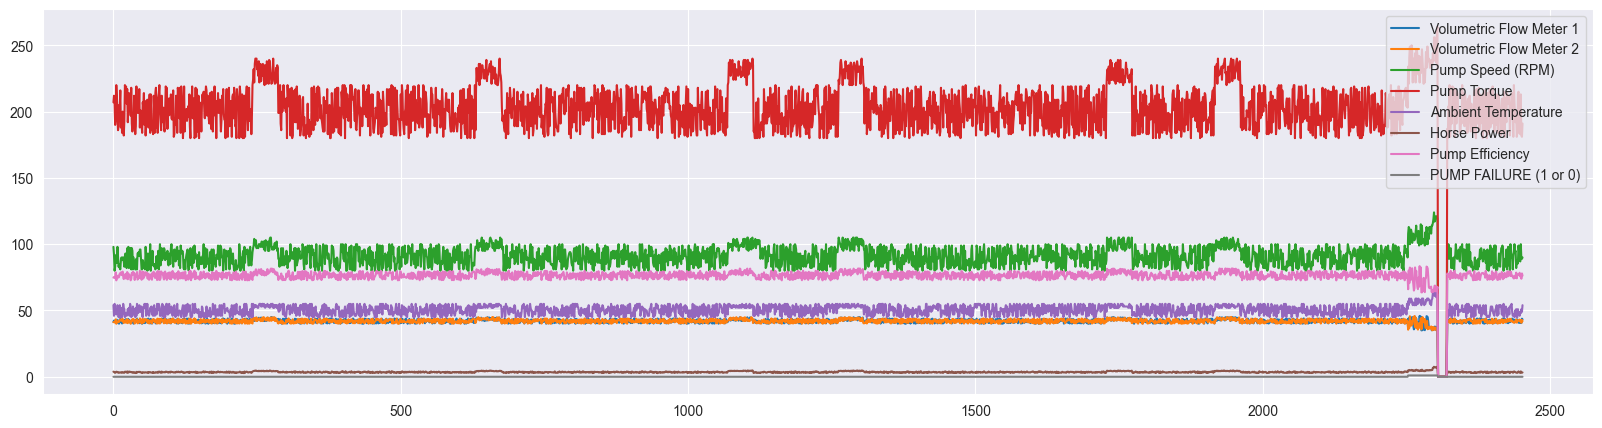

In [123]:
df_raw.plot(kind='box')
df_raw.plot(kind='line')

<Axes: >

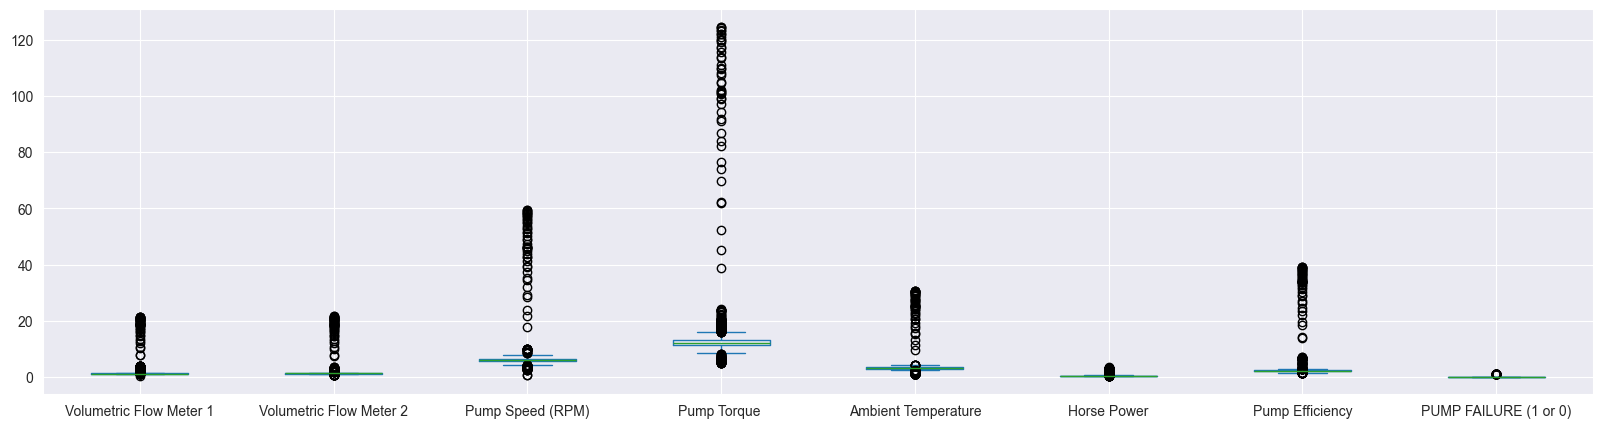

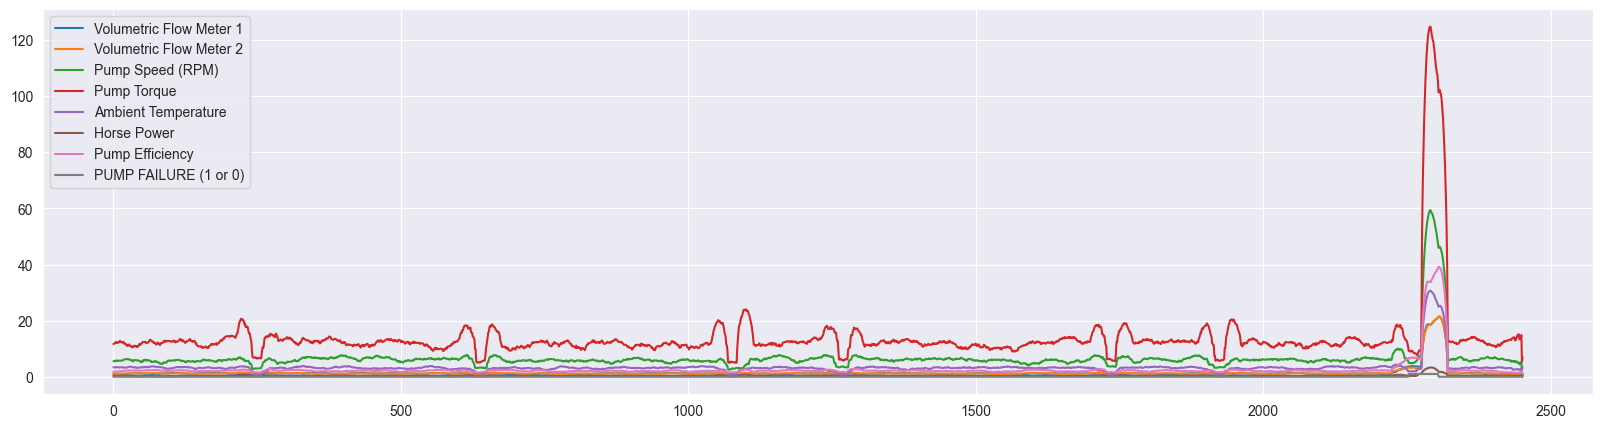

In [124]:
df_stdev.plot(kind='box')
df_stdev.plot(kind='line')

**Observations from Boxplots and Line Plots**

Outliers: There is a noticeable increase in the number of outliers within the dataframe_stdev. This could be a result of the rolling standard deviation process, which might amplify variations in the data, making outliers more prominent.

Pump Failure Analysis: Upon closer examination, it appears that there are more outliers when Pump Failure is set to 0, indicating that the pump is functioning normally. Additionally, the data generally exhibits higher variability and values when Pump Failure is set to 1, suggesting that the pump's performance becomes more erratic as it approaches failure.

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

The datasets contain a critical variable, Pump Failure (1 or 0), indicating whether the pump is failing (1) or functioning normally (0). This binary classification is essential for understanding the operational status of the pumps.

Given the nature of this data, it is reasonable to expect distinct differences between the conditions leading up to a failure and those during normal operations. To explore these potential differences, it's insightful to separate the datasets based on the Pump Failure variable, filtering for instances where the pump is either in a failed state or functioning normally. By doing so, we can visualize any trends or patterns that emerge between these two states.

To achieve this, I chose to subset the data using boolean filters. This approach allows me to create a clear distinction between the failure and normal operation conditions, which can then be visualized through box plots. These plots will help highlight any differences in the distribution of relevant variables between the two states.

For clarity and best practices, each box plot is carefully titled to distinguish between the pump's failure and normal operation states. This not only enhances the interpretability of the visualizations but also ensures that the insights are easy to follow.

Next, I applied the same filtering process to both the dataframe_raw and dataframe_stdev datasets to maintain consistency in the analysis.

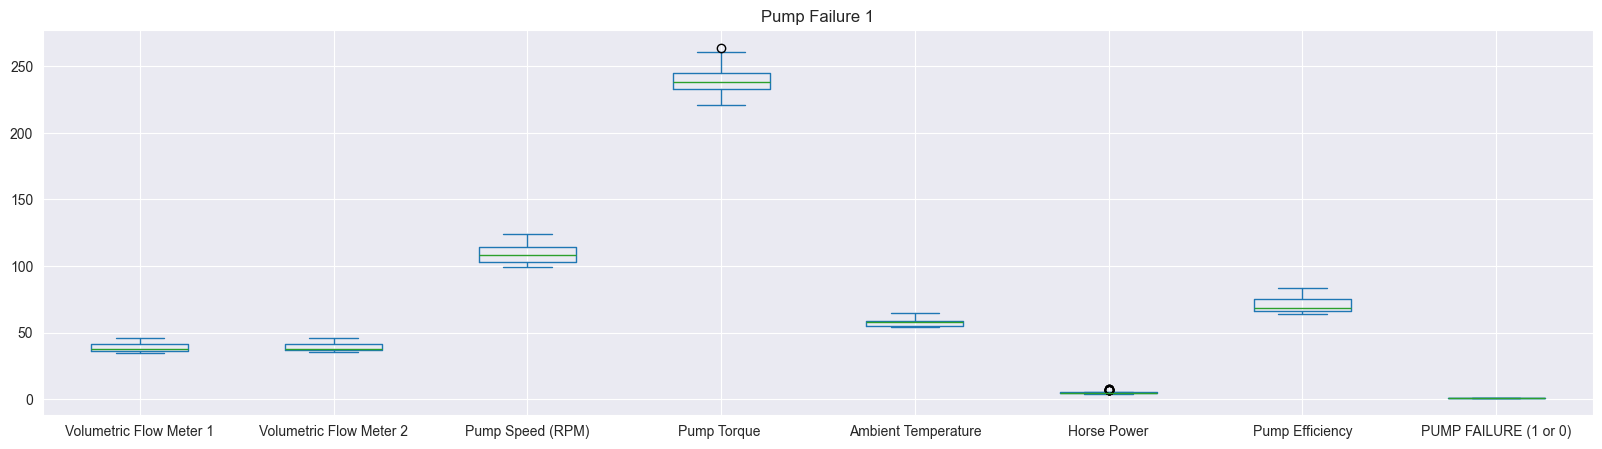

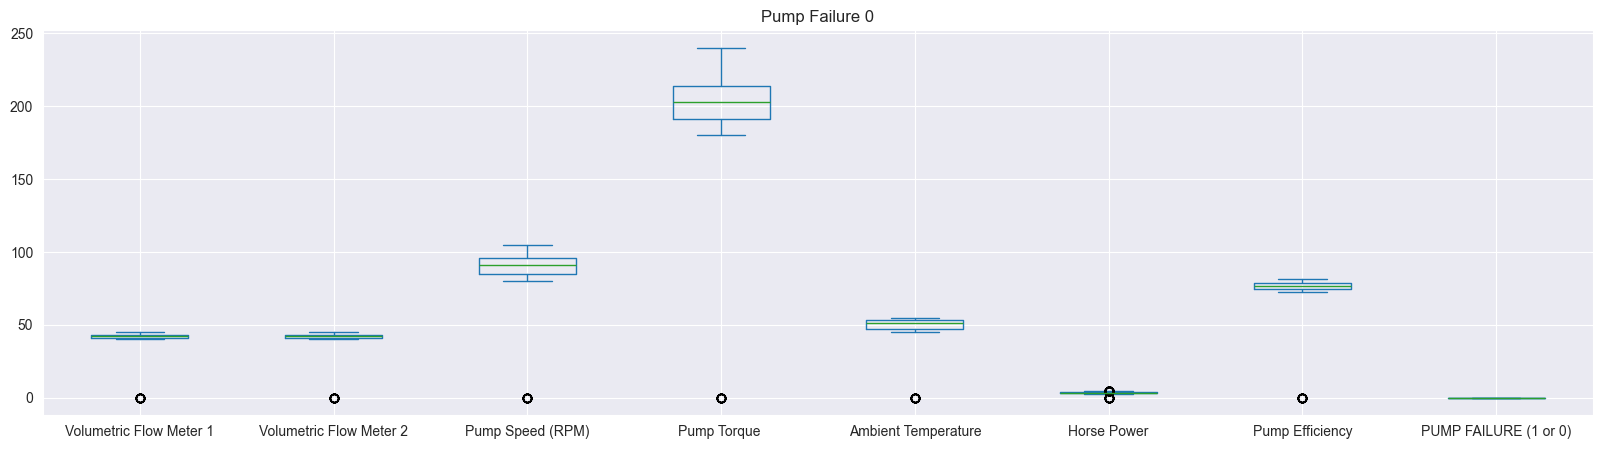

In [128]:
Failure_1 = df_raw['PUMP FAILURE (1 or 0)'] == 1
Raw_failure_1 = df_raw[Failure_1]
Raw_failure_1.plot(kind='box')
plt.title('Pump Failure 1')
plt.show()

Failure_0 = df_raw['PUMP FAILURE (1 or 0)'] == 0
Raw_failure_0 = df_raw[Failure_0]
Raw_failure_0.plot(kind='box')
plt.title('Pump Failure 0')
plt.show()

**Insights and Reflections**

When comparing the datasets in this manner, these observations suggest a complex relationship between the pump's operational state and the variability in its performance metrics. The increased variability and the presence of more outliers during normal operation might indicate potential precursors to pump failure, warranting further investigation.

By reflecting on these patterns, we can better understand how different data processing techniques influence our interpretation of the data, which is crucial for making informed decisions in a real-world context.

---------------------------------------------------------------------------

**Understanding and Addressing Outliers in Our Dataset**

Identifying and addressing outliers is crucial for ensuring the accuracy of our analysis. Outliers can skew our results and lead to misleading conclusions. Here’s how I systematically removed outliers from our dataset:

1. Determine the Quartiles: I began by calculating the first quartile (Q1) and the third quartile (Q3) for each variable in our dataset. Using Pandas’ .quantile() function, I found these percentiles to understand the data distribution.

2. Compute the Interquartile Range (IQR): Next, I computed the IQR, which is the difference between Q3 and Q1. This step is crucial for determining the spread of the central 50% of the data.

3. Establish Outlier Boundaries: I defined the boundaries for outliers using the formulas Lower_Range = Q1 - 1.5 * IQR and Upper_Range = Q3 + 1.5 * IQR.

4. Filter and Remove Outliers: I then used these boundaries to filter out the outliers from our dataset. Specifically, I created a new dataframe that excluded any data points falling outside these bounds.

5. Assess the Impact: Finally, I calculated the percentage of data remaining after outlier removal. This helped me understand the extent to which outliers affected our dataset size and the robustness of our analysis.

### Step 5: <span style="color:green">Creating Quartiles</span> 

To begin, I focused on creating the quartiles using the dataframe_raw dataset.

1. Defining Quartiles: I created two variables, Q1 and Q3, where Q1 holds the 25th percentile and Q3 holds the 75th percentile for each column in the dataset. For this, I utilized the .quantile() function, which is straightforward and efficient for calculating these percentiles.

2. Calculating the Interquartile Range (IQR): Once I had Q1 and Q3 defined, I proceeded to calculate the IQR, which is the difference between Q3 and Q1. This step is essential for understanding the spread of our data and setting the boundaries for identifying outliers. I then printed the IQR to review the spread across all columns.

In [133]:
Q1 = df_raw.quantile(0.25, numeric_only=True)
Q3 = df_raw.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identifying and Removing Outliers</span> 

Having established the IQR, the next step was to identify the outliers.

1. Setting Boundaries for Outliers: I defined two new variables, Lower_Limit and Upper_Limit, where:
    * Lower_Limit = Q1 - 1.5 * IQR
    * Upper_Limit = Q3 + 1.5 * IQR
    
2. Filtering Outliers: Using these limits, I filtered the dataframe_raw to isolate rows that contain outliers. This was done using a boolean condition that checks if any value in the dataset falls outside the established range. 

3. Assessing the Impact: After filtering out the outliers, I calculated the percentage of data that remains. This step is crucial to understanding how much of the dataset was affected by outlier removal, ensuring the robustness of our analysis moving forward.

In [136]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_raw[((df_raw[IQR.index] < lower_limit) | ((df_raw[IQR.index] > upper_limit))).any(axis=1)]
filtered_df = df_raw[~((df_raw[IQR.index] < lower_limit) | (df_raw[IQR.index] > upper_limit)).any(axis=1)]

num_original_entries = len(df_raw)
num_filtered_entries = len(filtered_df)
proportion_remaining = num_filtered_entries / num_original_entries

print(f"Number of original entries: {num_original_entries}")
print(f"Number of outliers: {len(outliers)}")
print(f"Number of entries after outlier removal: {num_filtered_entries}")
print(f"Percentage of data remaining: {proportion_remaining:.2%}")

Number of original entries: 2453
Number of outliers: 95
Number of entries after outlier removal: 2358
Percentage of data remaining: 96.13%


**Reflecting on Outlier Removal**

Based on the analysis, there is still  a substantial amount of data left (96.13%), indicating that outlier removal hasn’t compromised the dataset's integrity. Therefore, removing outliers appears to be a sound decision in this scenario.

---------------------------------------------------------------------------

After identifying the outliers in the dataset, the next logical step is to remove these outliers and observe how their absence affects the data visualization, specifically through box plots.

To accomplish this, I first defined the Outliers dataframe using the following condition:

`Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]`

To return a dataframe with zero outliers, I’ll add one key symbol:

**The ~ Symbol**

This symbol inverts the current boolean value from True to False in Python. Here’s an example of how to use it:

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With outliers removed, I created a new dataframe, no_outliers, and used it to generate box plots:

1. Generate Box Plots: I plotted two box plots:
* One for when PUMP FAILURE equals 1 (indicating failure).
* Another for when PUMP FAILURE equals 0 (indicating normal behavior).

2. Analyze the Plots: Comparing these plots helped me understand how the data distribution changed after outlier removal.

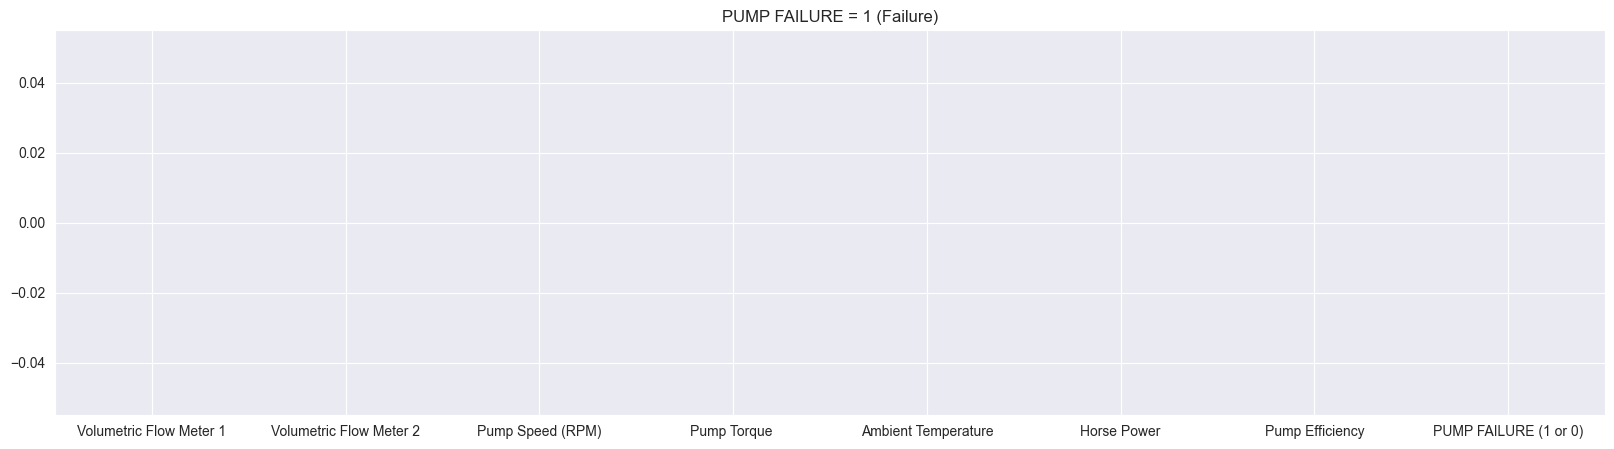

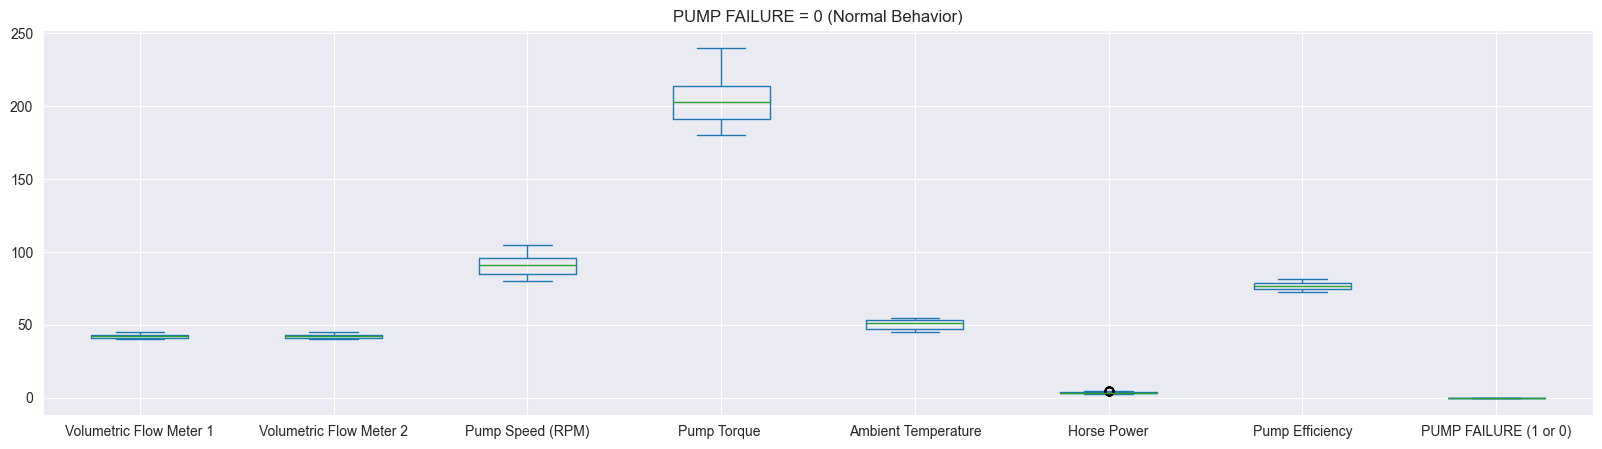

In [140]:
no_outliers = df_raw[~((df_raw[IQR.index] < lower_limit) | ((df_raw[IQR.index] > upper_limit))).any(axis=1)]

no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1].plot(kind='box')
plt.title('PUMP FAILURE = 1 (Failure)')

no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0].plot(kind='box')
plt.title('PUMP FAILURE = 0 (Normal Behavior)')

plt.show()

### Step 8: <span style="color:green">Plotting and Examining Each Column</span> 

When I initially plotted all variables together using a line plot, it was difficult to discern which variables were most significant in predicting pump failure. This issue arises because variables on different scales can obscure meaningful patterns when plotted simultaneously. To address this, I created a series of plots, each highlighting a single variable's relationship with pump failure. This helps streamline the analysis and better understand which variables may contribute most to predicting failures.

To achieve this:

1. Define the Variables: I created a list containing the names of all the numerical variables in the dataset to be analyzed. This list will guide the iteration process.

2. Loop through Variables: Next, I looped through each variable in the list, plotting it against pump failure. Utilizing a dual-axis approach where the first axis will show the variable, and the second axis, using a twin plot, will display the pump failure data. This dual-axis setup will allow for seeing the relationship between each variable and pump failure clearly.

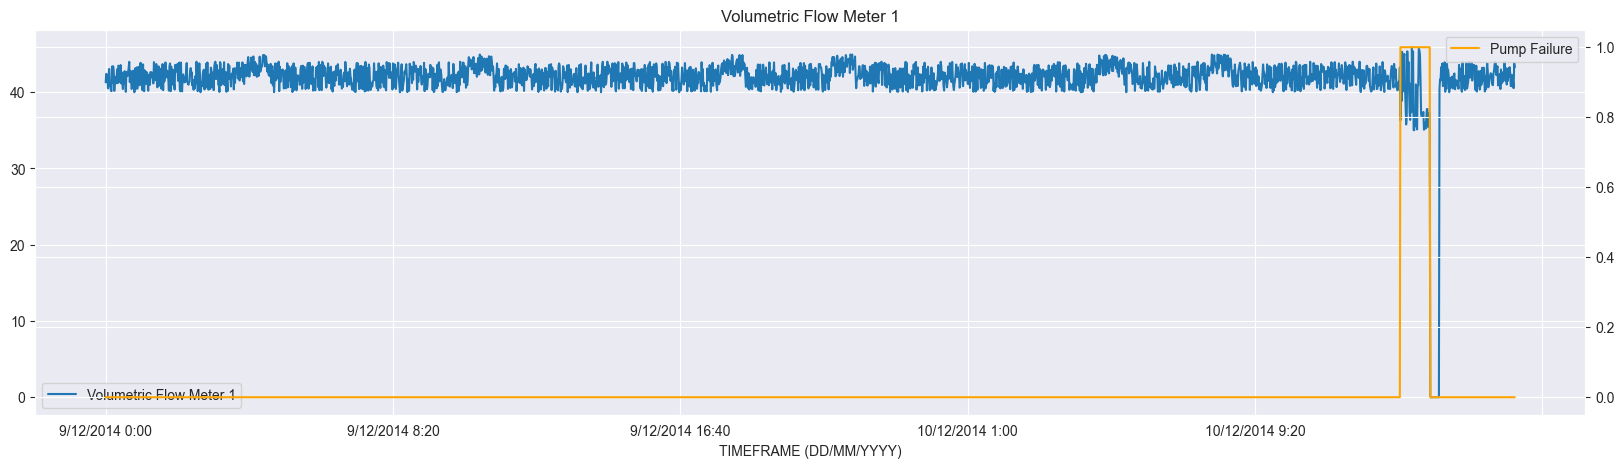

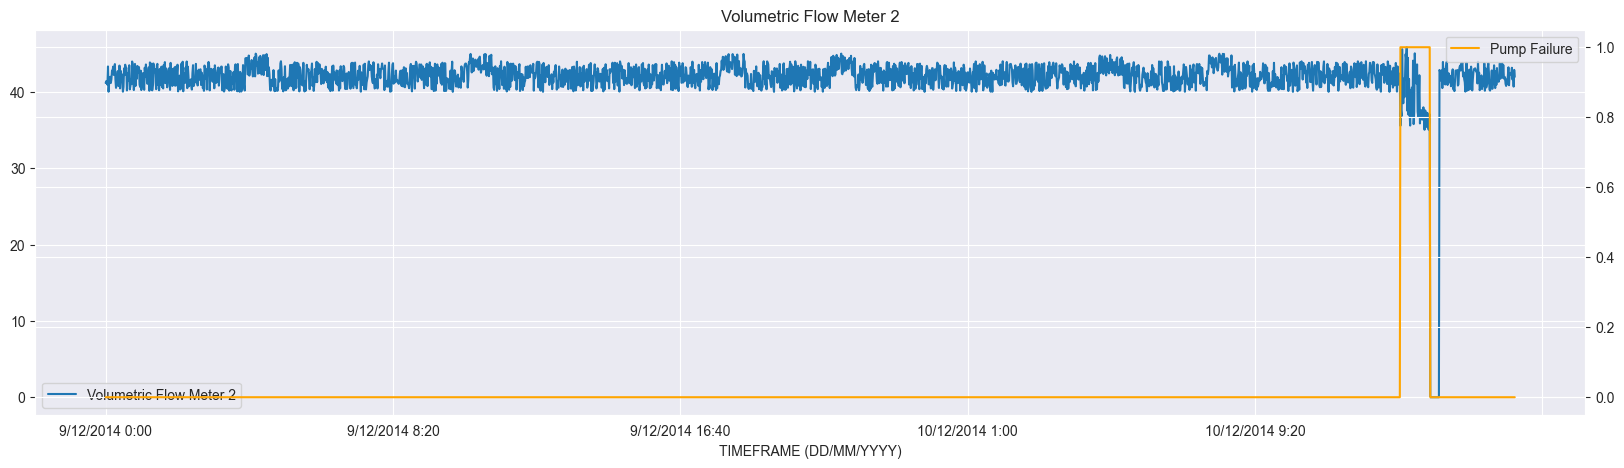

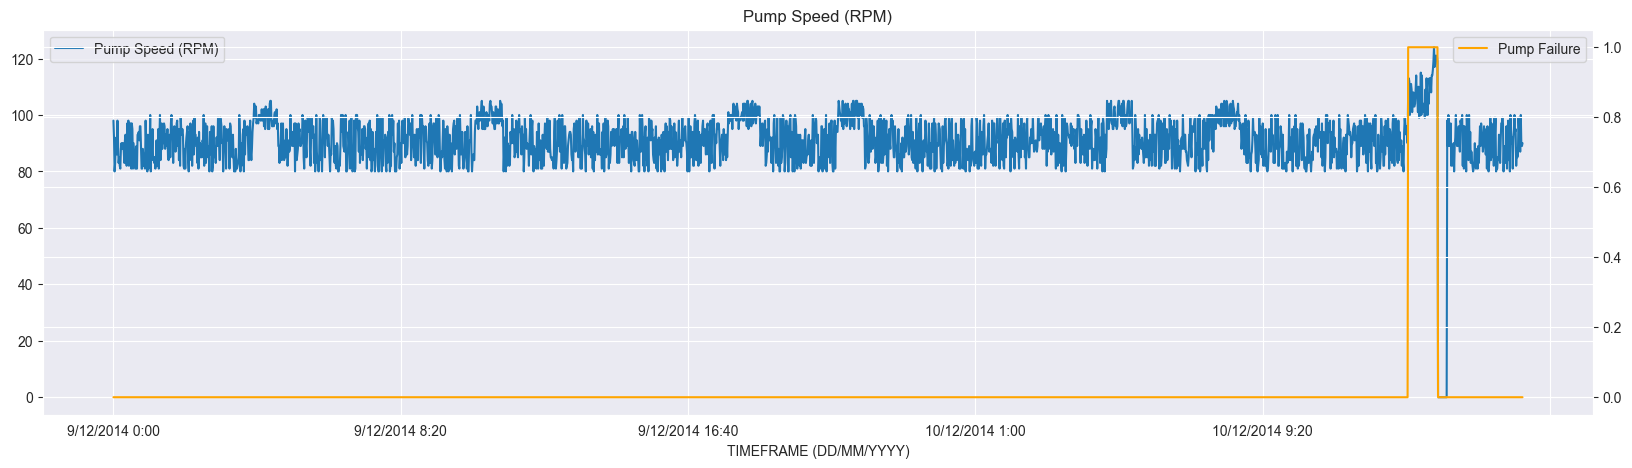

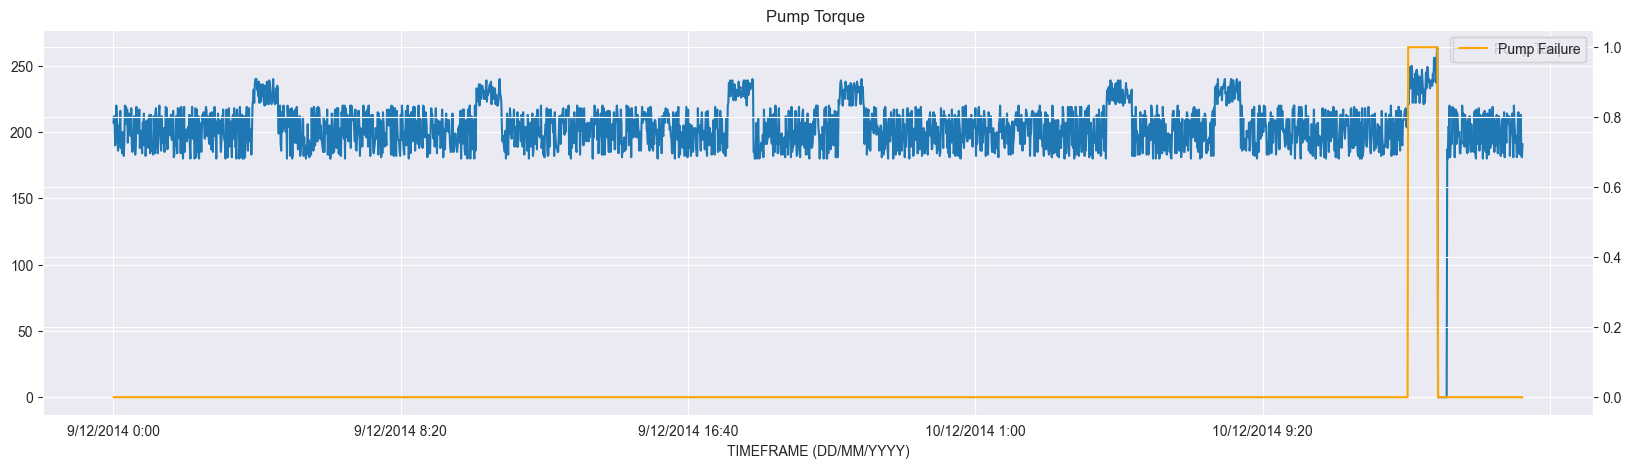

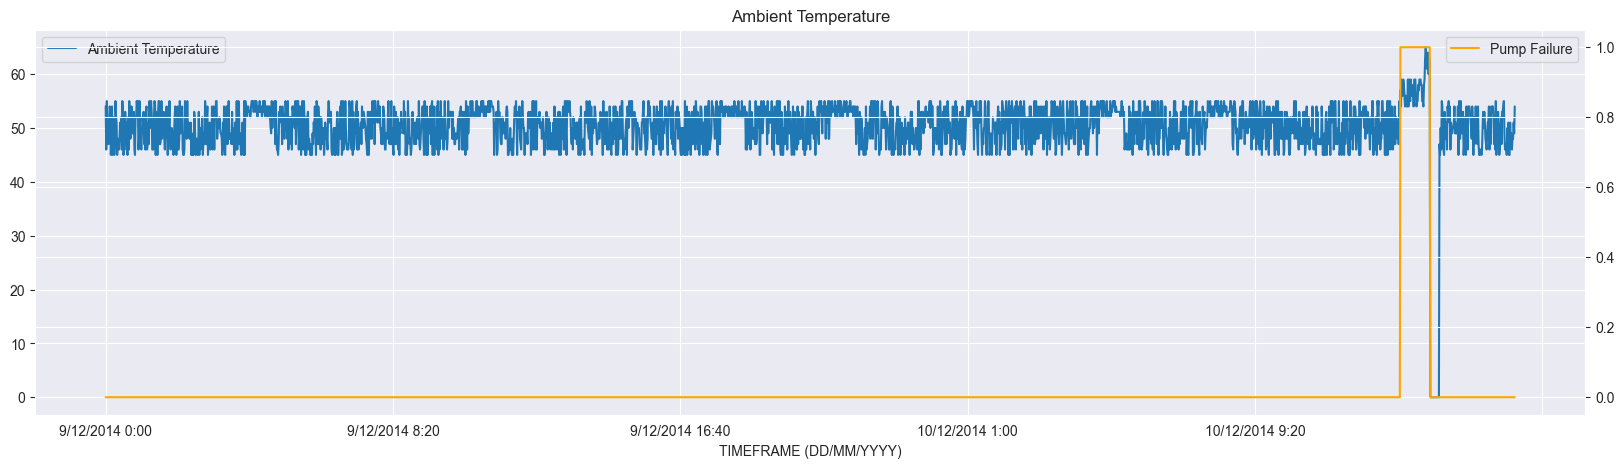

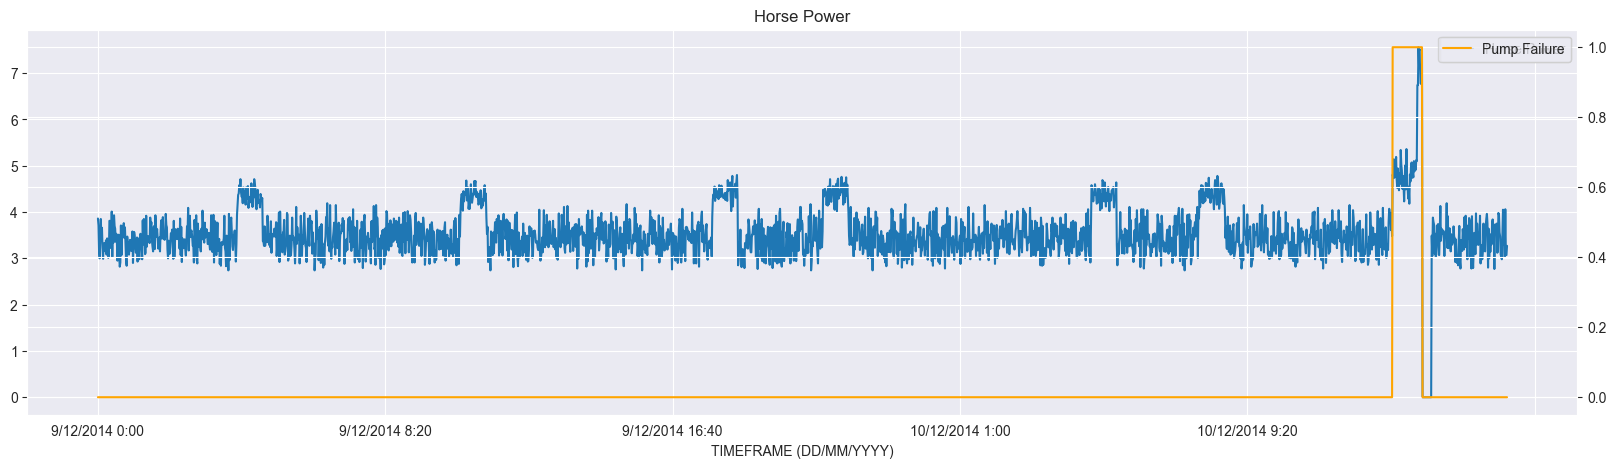

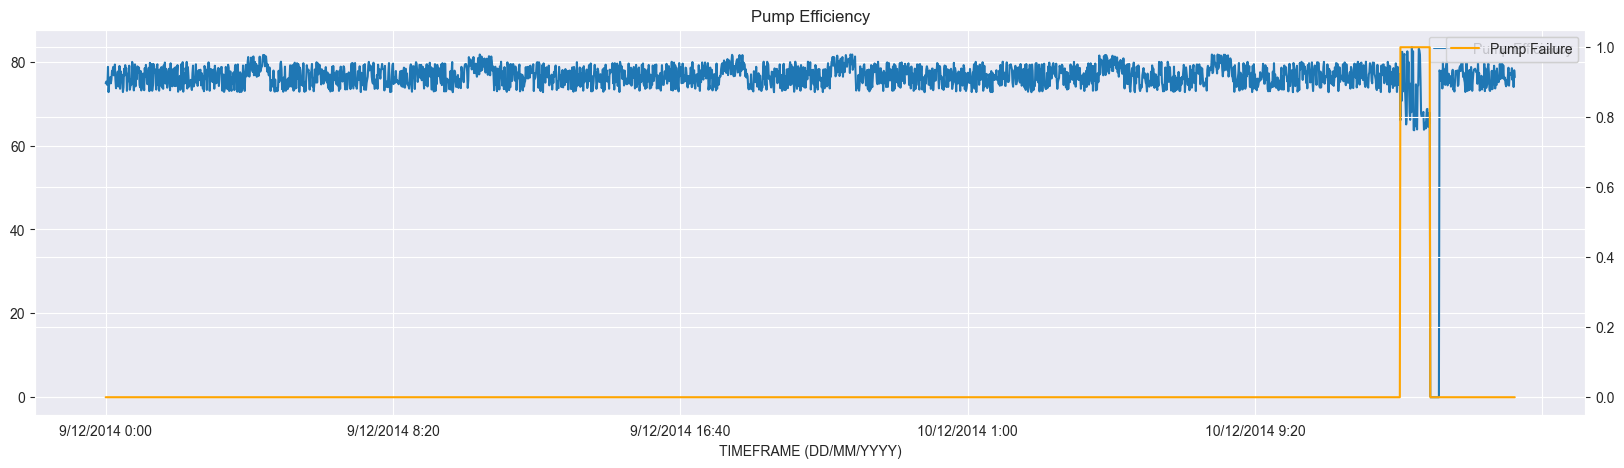

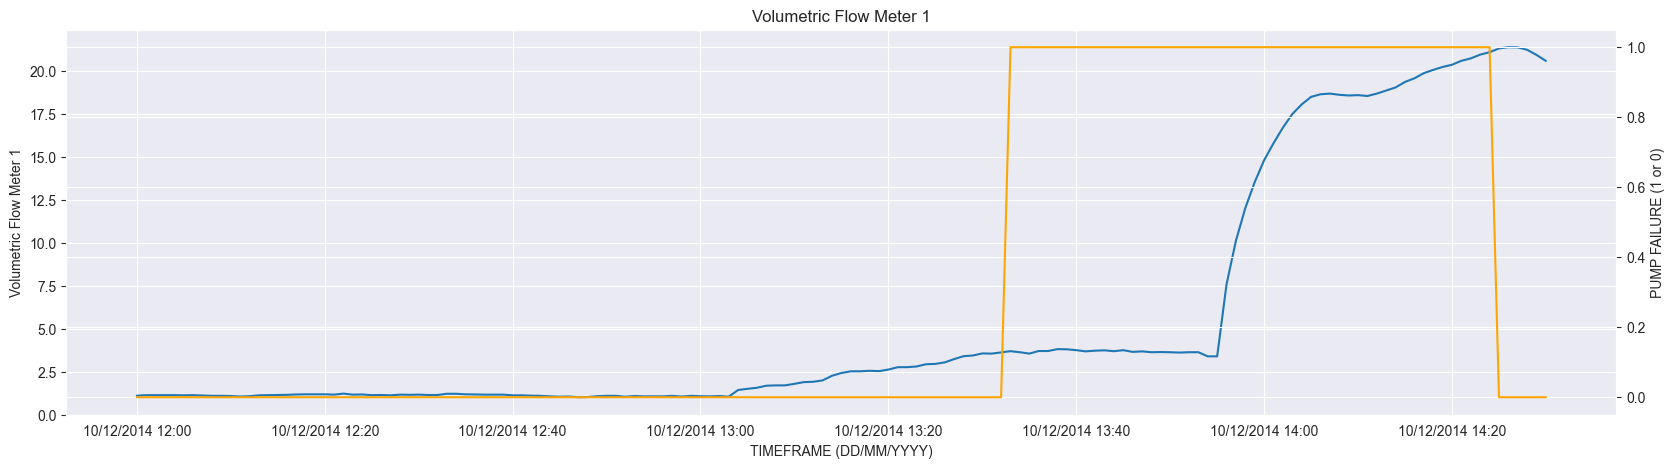

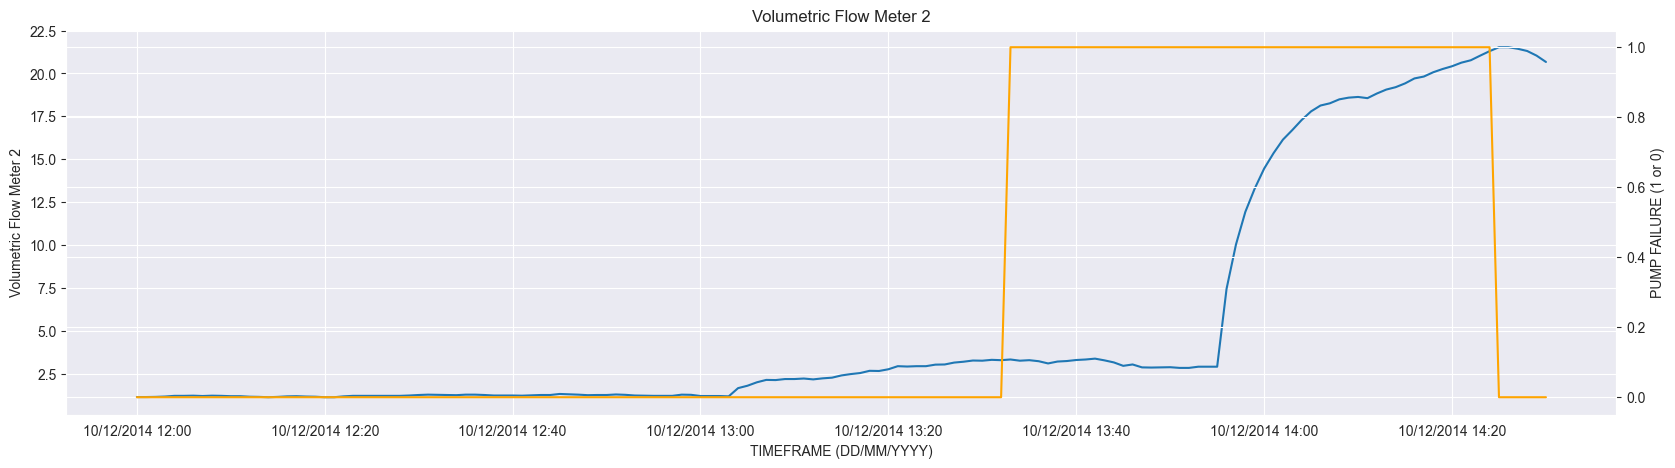

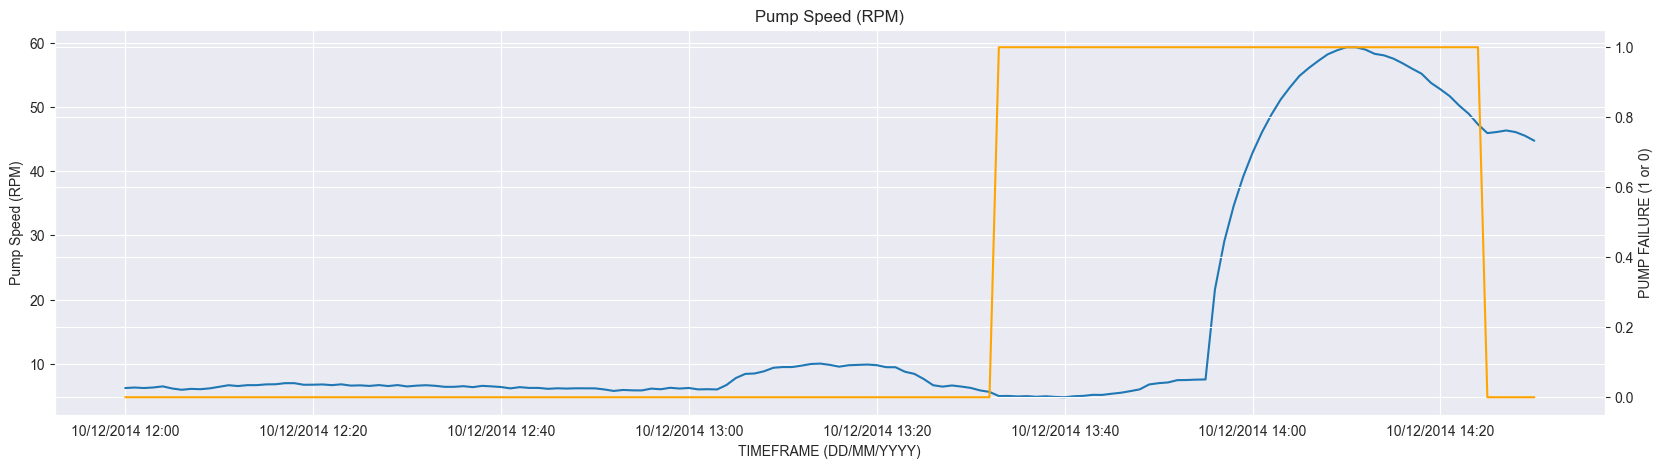

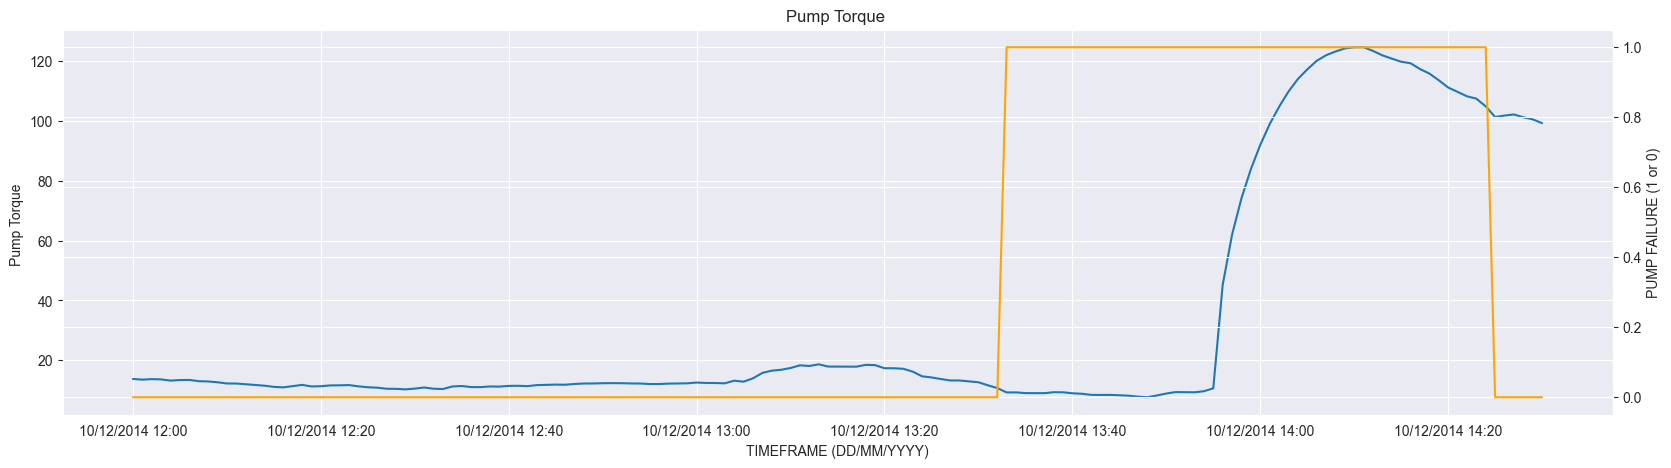

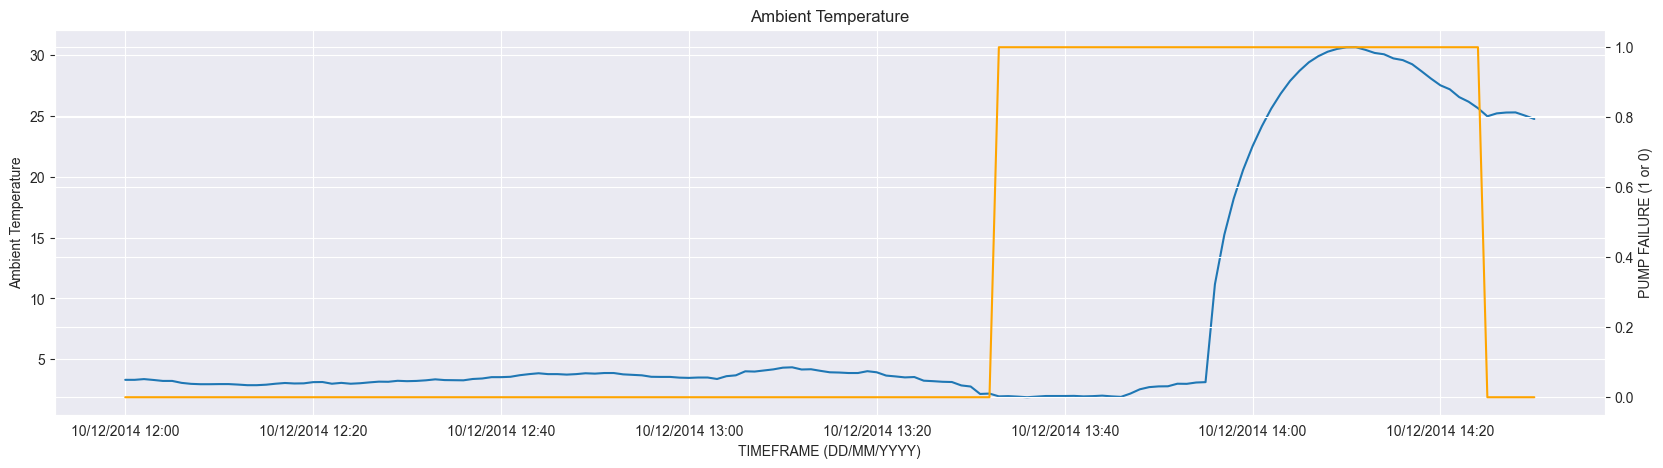

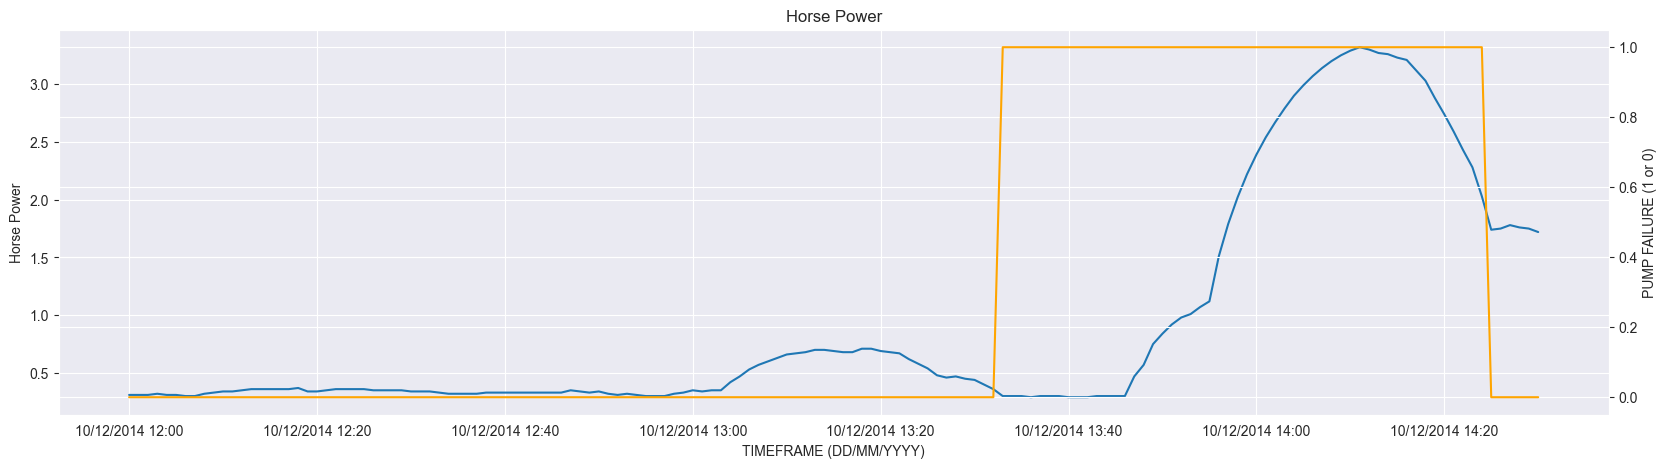

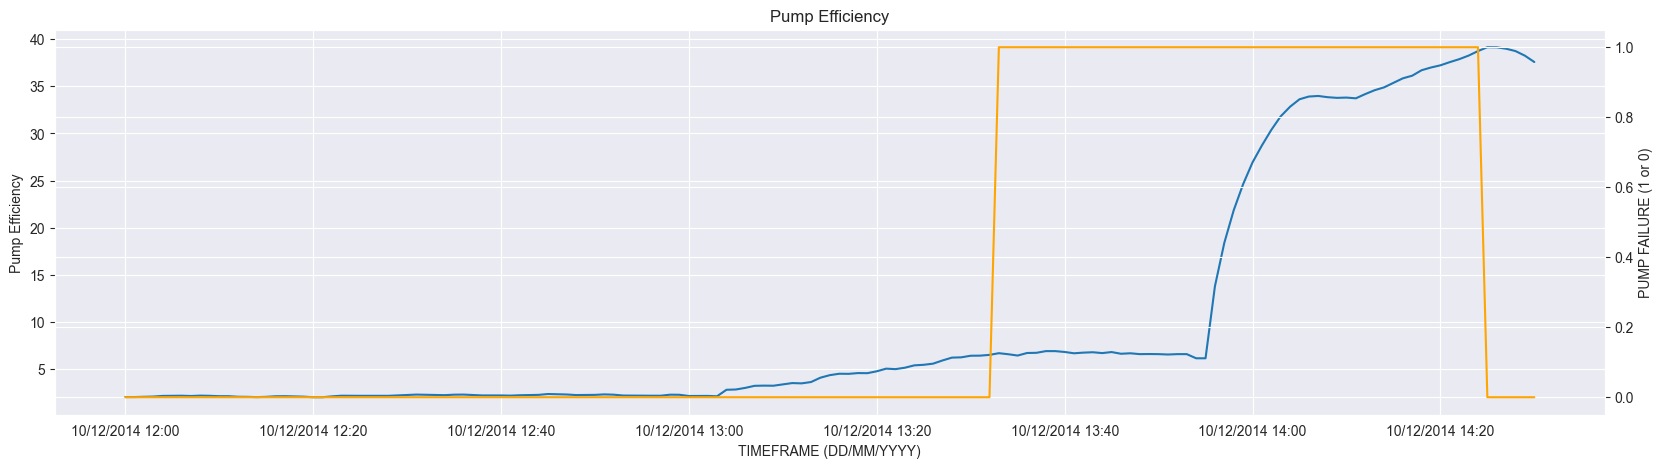

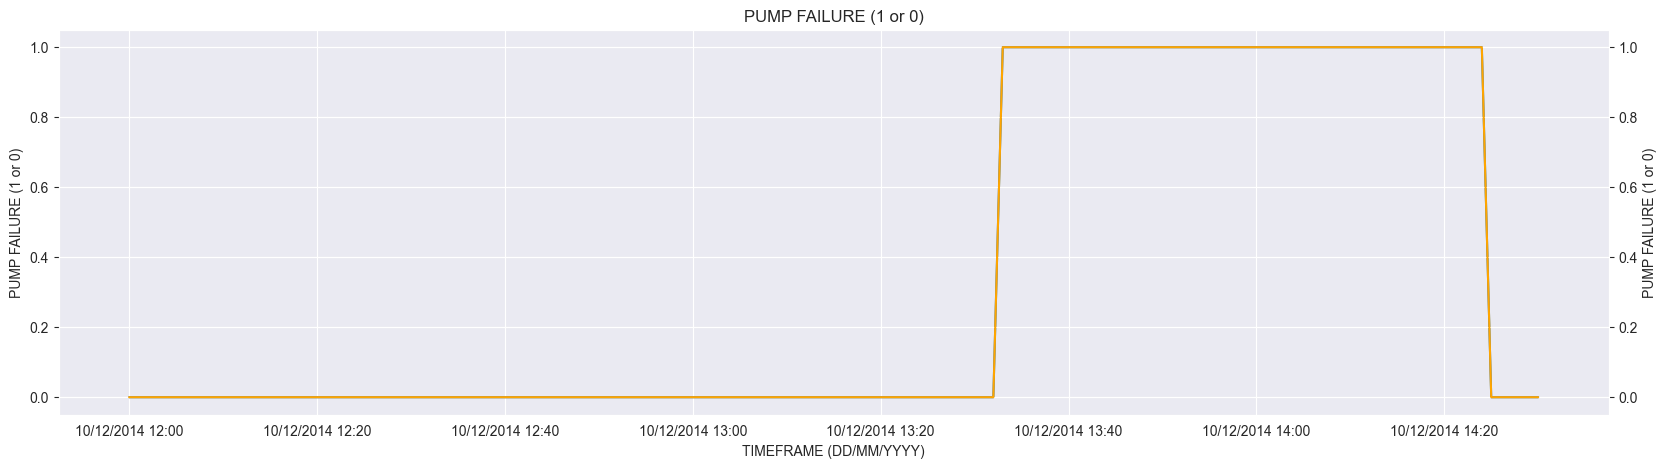

In [142]:
ListOfVariables = ['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)',
                   'Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']
for item in ListOfVariables:
    first_axis = df_raw.plot(x='TIMEFRAME (DD/MM/YYYY)', y=item)
    second_axis = first_axis.twinx()
    second_axis.plot(df_raw["PUMP FAILURE (1 or 0)"], color='orange', label='Pump Failure')
    second_axis.legend()
    plt.title(item)
    plt.show()

ListOfVariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ','Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']
df_stdev = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
df_time_filtered = df_stdev.loc["10/12/2014 12:00":"10/12/2014 14:30"]
for item in ListOfVariables:
    first_axis = df_time_filtered[item].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis = first_axis.twinx()
    second_axis.plot(df_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    first_axis.set_ylabel(item)
    second_axis.set_ylabel('PUMP FAILURE (1 or 0)')
    plt.title(item)
    plt.show()

**Observing Trends in Individual Variables**

By isolating each variable, it becomes much clearer to see which ones might be more reactive to pump failures. For instance, it seems that Horsepower might have a stronger reaction to pump failure compared to other variables. This method of plotting allows us to focus on individual contributions, making it easier to identify key drivers behind pump failures.

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev </span> </h3>

---

### Step 9: <span style="color:green">Creating a Plot for Pump Failures Over a Rolling Time Period</span> 

In this step, my goal is to visualize pump failures over a specified time period and observe how different variables interact with these failures.

1. Setting the Index: I started by setting the index of the dataframe_stdev dataset to the TIMEFRAME attribute. This allows me to use time-based indexing for easier filtering and plotting.

2. Plotting Numerical Variables: Using the List_Of_Variables I compiled in Step 8, I re-plotted all the numerical variables in the dataframe_stdev for the time period from 10/12/2014 12:00 to 10/12/2014 14:30. The goal was to visualize how each variable behaves over time in relation to pump failures.

    * For each variable, I created a plot with two y-axes. The secondary y-axis is used for the Pump Failure variable, allowing me to observe how the numerical variables and pump failures relate to each other over time.


3. Filtering the Time Period: To focus on the specified time period, I filtered the dataframe accordingly. This involved using a time-based filter syntax. This step ensures that my plots reflect the data from the exact time frame of interest, providing a clearer picture of the pump failures and their relationship with other variables.

In [147]:
ListOfVariables = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ','Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']
df_stdev_ii = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
df_time_filtered = df_stdev.loc["10/12/2014 12:00":"10/12/2014 14:30"]
for item in ListOfVariables:
    first_axis = df_time_filtered[item].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis = first_axis.twinx()
    second_axis.plot(df_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    first_axis.set_ylabel(item)
    second_axis.set_ylabel('PUMP FAILURE (1 or 0)')
    plt.show()

KeyError: "None of ['TIMEFRAME (DD/MM/YYYY)'] are in the columns"

---

# Part II: <span style="color:green">Inferential Statistical Analysis</span>

### Step 10: <span style="color:purple">Creating a Heatmap</span>
Creating a heatmap in Seaborn allows us to visually explore the relationships between different variables in our dataset, making it easier to spot patterns and correlations that could influence pump failure. By using Seaborn’s heatmap function, I created a clear and aesthetically pleasing heatmap that highlights these correlations.

1. Generating the Heatmap: I used Seaborn’s heatmap function to create a heatmap that visualizes the correlations (R) among all variables in the dataframe_raw dataset.
   * The annot=True argument ensures that the correlation coefficients are annotated on the heatmap, making it easier to interpret the strength of correlations.
  
2. Preparing the Data: Before using Seaborn’s heatmap function, I first calculated the correlation matrix of my dataframe using the .corr() function from Pandas. This step is crucial as it provides the correlation values needed for the heatmap.
3. Once I had the correlation matrix, I passed it to the sns.heatmap() function to visualize the correlations.

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
correlated_df = df_raw.corr(method='pearson', numeric_only=True)
sns.heatmap(correlated_df, annot=True)

**Which variables seem to correlate with Pump Failure?**

Horse Power shows the most significant positive correlation, suggesting it might be a critical factor in predicting pump failure.

### Step 11: <span style="color:purple">Creating a Barplot of Correlated Features</span>

To further analyze the relationship between features and pump failure, I decided to visualize the correlation of features with PUMP FAILURE.

1. Generating the Correlation Dataframe: First, I used the .corr() function on my dataframe to obtain a correlation matrix. This matrix shows the correlation coefficients between all pairs of features, including PUMP FAILURE. The resulting dataframe provided a clear view of how each feature relates to the target variable.

2. Creating the Barplot: With the correlation data in hand, I focused on visualizing the features' correlation with PUMP FAILURE. I created a barplot to display these correlations in descending order. This visualization highlights which features are most strongly correlated with pump failure, making it easier to identify significant predictors.

The barplot effectively communicated the relative importance of each feature in relation to pump failure, aiding in the interpretation of the dataset and guiding further analysis.

In [ ]:
correlation_matrix = df_raw.corr(method='pearson', numeric_only=True)

pump_failure_correlations = correlation_matrix["PUMP FAILURE (1 or 0)"]

sorted_correlations = pump_failure_correlations.sort_values(ascending=False)

sorted_correlations.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Pump Failure')
plt.title('Features Correlated with Pump Failure (1 or 0)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

### Step 12: <span style="color:purple">Exploring Rolling Standard Deviation with a Heatmap</span> 

In the earlier heatmap, the relationships forsome correlations using the raw variables weren’t as strong. To enhance my analysis, I used the dataframe_stdev dataset, which contains the rolling standard deviation of these variables. This approach may reveal stronger correlations that weren’t as apparent with the raw data.

I followed a similar process as before, creating a heatmap with the rolling standard deviation data.

In [ ]:
correlated_df = df_stdev.corr(method='pearson', numeric_only=True)
sns.heatmap(correlated_df, annot=True)

**Interpreting the results**

After generating the heatmap, I examined the correlations to identify any variables that stood out. In this case, Horse Power consistently showed the strongest positive correlation with Pump Failure. This result was noted below the heatmap for further analysis.

### Creating a Multivariate Regression Model


In this step, I'll utilize the statsmodels.api library, which I imported earlier, to apply Ordinary Least Squares (OLS) Regression. This approach allows me to create a multivariate regression model, where multiple independent variables are used to predict the dependent variable.

### Step 13: <span style="color:purple">Applying OLS Regression</span>
1. Establish DataFrames: First, I need to set up two DataFrames: independent_variables and dependent_variable. The independent variables, also known as explanatory variables, help explain the model's behavior. In contrast, the dependent variable is the outcome I aim to predict. For this analysis, the dependent variable is Pump Failure (indicating failure as 1 or normal operation as 0).
    
2. Add a Constant: To account for bias in the model, I add a constant to the independent_variables. This step appends a column of ones to the DataFrame, which serves as the intercept in the regression model.
    
3. Fit the Model: Next, I fit the regression model.
    
4. View the Results: To evaluate the performance and details of the regression model, I print the summary. This summary provides a comprehensive overview of the model’s statistics and performance metrics.

5. Repeat with Different Data: I repeat the above steps using the dataframe_stdev dataset, which involves the same process but with this alternative dataset. This comparison allows me to analyze the impact of different data on the regression model.


In [ ]:
#Dataframe_Raw

import statsmodels.api as sm
import pandas as pd

# Display the first few rows to check for any immediate issues
print(df_raw.head())

# Fill missing values with the mean of each column
df_raw = df_raw.fillna(df_raw.mean())

# Ensure columns are numeric
columns_to_check = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
df_raw[columns_to_check] = df_raw[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Check for and drop any remaining rows with NaNs
df_raw = df_raw.dropna(subset=columns_to_check + ["PUMP FAILURE (1 or 0)"])

# Select the specified columns for independent and dependent variables
independent_variables_raw = df_raw[columns_to_check]
dependent_variable_raw = df_raw["PUMP FAILURE (1 or 0)"]

# Add a constant to the independent variables
independent_variables_raw = sm.add_constant(independent_variables_raw)

# Fit the OLS model
try:
    regression_model_raw = sm.OLS(dependent_variable_raw, independent_variables_raw).fit()
    print(regression_model_raw.summary())
except ValueError as e:
    print(f"Error fitting the regression model: {e}")
    # Print data statistics to diagnose the issue
    print(df_raw.describe())

In [ ]:
#Dataframe_Stdev
independent_variables_stdev = df_stdev[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]
dependent_variable_stdev = df_stdev["PUMP FAILURE (1 or 0)"]
independent_variables_stdev = sm.add_constant(independent_variables_stdev)
regression_model_stdev = sm.OLS(dependent_variable_stdev, independent_variables_stdev).fit()
print(regression_model_stdev.summary())

**Comparison:**
The model with the higher R-squared value explains a greater proportion of the variance in pump failure. For instance, an R-squared value of 0.778 indicates that approximately 77.8% of the variance in pump failure can be explained by the independent variables.

### Step 14: <span style="color:purple">Analyzing Coefficients </span>

It's evident that the regression model with the rolling standard deviation, regression_model_stdev, provides the best fit. Now, the goal is to delve deeper into this model by examining its coefficients to understand which variables exhibit the most significant absolute changes concerning Pump Failure.

**Extracting and Visualizing Coefficients**

1. Extracting Coefficients: To start, I used the .params method to extract the coefficients from regression_model_stdev. This step is crucial for identifying which variables show the most pronounced effect on Pump Failure.
2. Creating a Bar Plot: Once I had the coefficients, I created a bar plot to visually represent the strength of the relationship each coefficient has with Pump Failure. This visualization allows for a straightforward comparison, highlighting which variables demonstrate the strongest reactions.

   The bar plot should clearly illustrate the coefficients, making it easy to identify the top three variables with the highest absolute impact on Pump Failure.

3. Identifying Key Variables: By examining the bar plot, I pinpointed the three variables that show the strongest relationship with Pump Failure. This insight is valuable for understanding which factors have the most significant influence on the outcome of interest.

In [ ]:
coefficients = regression_model_stdev.params
coefficients_sorted = coefficients.sort_values(ascending=True)
coefficients_sorted.plot(kind='bar', color='blue')
plt.show()


### Step 15: <span style="color:purple">Validating Predictions</span> 

With the model in place, the next crucial step is to validate its predictions. This will allow me to assess how well the model's forecasts align with real-world outcomes

1. Create Prediction Column: I began by adding a new column to the dataframe_stdev dataset, which I named 'Prediction'. This column will store the predicted values from my regression model.
    
2. Apply the .predict() Function: Using the regression equation I developed earlier, I applied the .predict() function to the independent variables in the dataframe_stdev dataset. This step generated a column of predictions based on the model. 
    
3. Create a Dual-Axis Plot: To visualize the predictions alongside actual values, I created a dual-axis plot. Here’s how I set it up:

    * Axes One: Included Volumetric Flow Meter 2, Pump Efficiency, and Horse Power.
    * Axes Two: Featured Pump Failure (1 or 0) and the newly created Prediction column.


     For the dual-axis plot, I utilized the .twinx() function to overlay the two sets of data effectively.

In [ ]:
independent_variables_stdev = sm.add_constant(df_stdev[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']])
df_stdev['Prediction'] = regression_model_stdev.predict(independent_variables_stdev)
fig, ax1 = plt.subplots(figsize=(14, 4))
ax1.plot(df_stdev['Volumetric Flow Meter 2'], label='Volumetric Flow Meter 2', color='blue')
ax1.plot(df_stdev['Pump Efficiency'], label='Pump Efficiency', color='green')
ax1.plot(df_stdev['Horse Power'], label='Horse Power', color='red')
ax1.set_xlabel('TIMEFRAME')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)
ax2 = ax1.twinx()
ax2.plot(df_stdev['PUMP FAILURE (1 or 0)'], label='Pump Failure (1 or 0)', color='black', zorder=3)
ax2.plot(df_stdev['Prediction'], label='Prediction', color='purple')
ax2.tick_params(axis='y')
ax2.legend(loc='lower right', bbox_to_anchor=(0, 0.9), frameon=False)
plt.title('Regressive Equation Plot')
plt.show()